In [14]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('credit_card_customers.csv')
df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [15]:
df.loc[df['PAYMENTS'] == 0, 'MINIMUM_PAYMENTS'] = 0

ranges = [(1, 50), (51, 100), (101, 150)]
for lower, upper in ranges:
    mean_value = df.loc[(df['PAYMENTS'] >= lower) & (df['PAYMENTS'] <= upper), 'MINIMUM_PAYMENTS'].mean()  # Adjust column names
    df.loc[(df['PAYMENTS'] > lower) & (df['PAYMENTS'] <= upper) & df['MINIMUM_PAYMENTS'].isna(), 'MINIMUM_PAYMENTS'] = mean_value  # Adjust column names

overall_mean = df['MINIMUM_PAYMENTS'].mean()
df['MINIMUM_PAYMENTS'].fillna(overall_mean, inplace=True)

credit_limit_mean = df['CREDIT_LIMIT'].mean()
df['CREDIT_LIMIT'].fillna(credit_limit_mean, inplace=True)

df.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


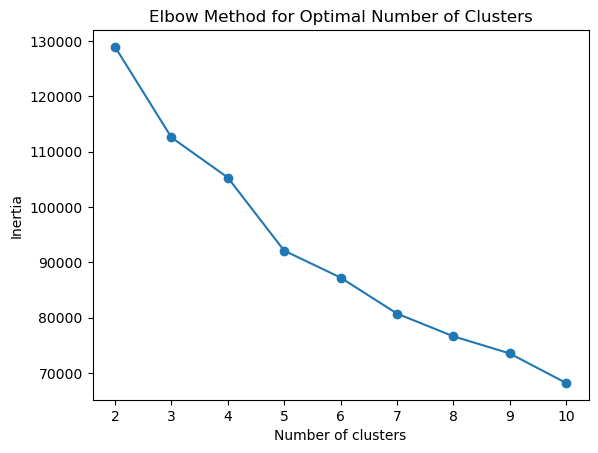

Average inertia: 91719.65159256305


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,3
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3


In [26]:
df_copy = df.copy()

customer_ids = df_copy['CUST_ID']
df_copy = df_copy.drop(columns=['CUST_ID'])

imputer = SimpleImputer(strategy='mean')
df_imputed = imputer.fit_transform(df_copy)

scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_imputed)

inertia_values = [KMeans(n_clusters=k, random_state=42).fit(df_scaled).inertia_ for k in range(2, 11)]

average_inertia = sum(inertia_values) / len(inertia_values)

plt.plot(range(2, 11), inertia_values, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.show()

k_optimal = 5

kmeans = KMeans(n_clusters=k_optimal, random_state=42)
df_copy['CLUSTER'] = kmeans.fit_predict(df_scaled)

df_copy.insert(0, 'CUST_ID', customer_ids)

print(f"Average inertia: {average_inertia}")
df_copy.head()



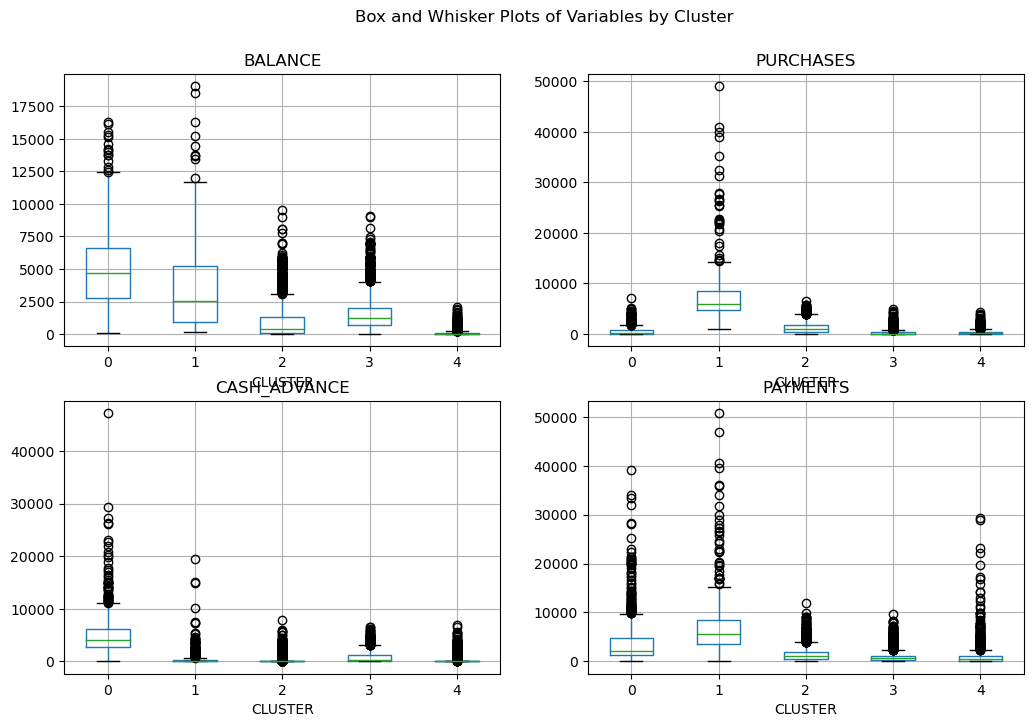

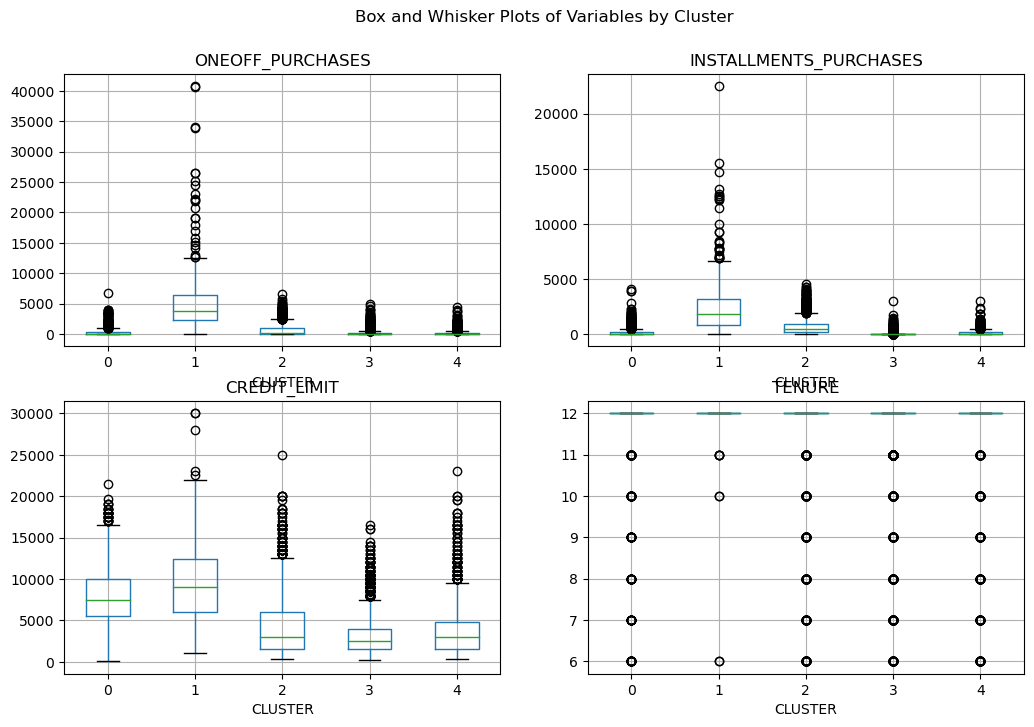

        BALANCE                                                     \
          count         mean          std         min          25%   
CLUSTER                                                              
0         987.0  4903.428600  2825.987966   78.114579  2754.674041   
1         395.0  3588.990384  3369.520932  137.636267   900.725141   
2        3164.0   930.357741  1233.301596    1.198223    94.778805   
3        3047.0  1526.118239  1252.459881    0.488050   659.526474   
4        1357.0   111.260364   230.353735    0.000000     7.097146   

                                                BALANCE_FREQUENCY            \
                 50%          75%           max             count      mean   
CLUSTER                                                                       
0        4696.525962  6644.008337  16304.889250             987.0  0.967095   
1        2504.312118  5220.903925  19043.138560             395.0  0.986874   
2         376.941154  1297.300459   9502.256

In [27]:
customer_ids_copy = df_copy['CUST_ID']
df_copy = df_copy.drop(columns=['CUST_ID'])

cluster_statistics_copy = df_copy.groupby('CLUSTER').describe()

fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
df_copy.boxplot(by='CLUSTER', column='BALANCE', ax=axes[0, 0])
df_copy.boxplot(by='CLUSTER', column='PURCHASES', ax=axes[0, 1])
df_copy.boxplot(by='CLUSTER', column='CASH_ADVANCE', ax=axes[1, 0])
df_copy.boxplot(by='CLUSTER', column='PAYMENTS', ax=axes[1, 1])
plt.suptitle('Box and Whisker Plots of Variables by Cluster')
plt.show()

fig2, axes = plt.subplots(nrows=2, ncols=2, figsize=(12, 8))
df_copy.boxplot(by='CLUSTER', column='ONEOFF_PURCHASES', ax=axes[0, 0])
df_copy.boxplot(by='CLUSTER', column='INSTALLMENTS_PURCHASES', ax=axes[0, 1])
df_copy.boxplot(by='CLUSTER', column='CREDIT_LIMIT', ax=axes[1, 0])
df_copy.boxplot(by='CLUSTER', column='TENURE', ax=axes[1, 1])
plt.suptitle('Box and Whisker Plots of Variables by Cluster')
plt.show()

cluster_correlation_copy = df_copy.groupby('CLUSTER').corr()

trend_analysis_copy = df_copy.groupby('CLUSTER').mean()

cluster_comparison_PF_copy = pd.crosstab(df_copy['CLUSTER'], df_copy['PURCHASES_FREQUENCY'])
cluster_comparison_CL_copy = pd.crosstab(df_copy['CLUSTER'], df_copy['CREDIT_LIMIT'])

df_copy.insert(0, 'CUST_ID', customer_ids_copy)

print(cluster_statistics_copy)

print("\nCorrelation Analysis:")
print(cluster_correlation_copy)

print("\nTrend Analysis:")
print(trend_analysis_copy)

print("\nCluster Comparison (Purchase Frequency):")
print(cluster_comparison_PF_copy)

print("\nCluster Comparison (Credit Limit):")
print(cluster_comparison_CL_copy)


In [28]:
df_clusters = df_copy.copy()

cluster_names = {
    0: "Financial Planners",
    1: "Big Spenders",
    2: "Working-Class",
    3: "Minimalists",
    4: "Students"
}

df_clusters['CLUSTER_NAME'] = df_clusters['CLUSTER'].map(cluster_names)

df_clusters.head()


,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE,CLUSTER,CLUSTER_NAME
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12,3,Minimalists
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12,0,Financial Planners
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12,2,Working-Class
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,0.000000,0.000000,12,3,Minimalists
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12,3,Minimalists


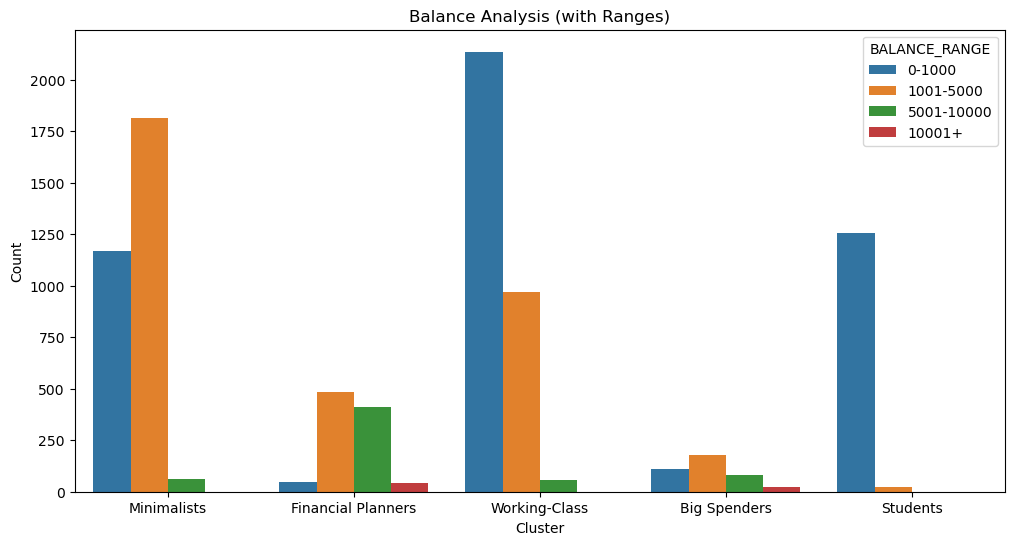

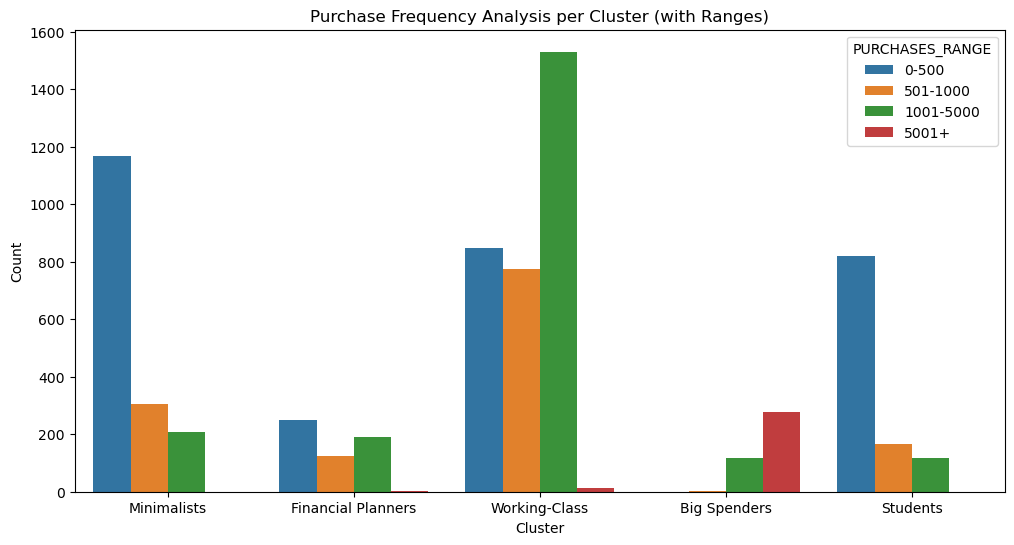

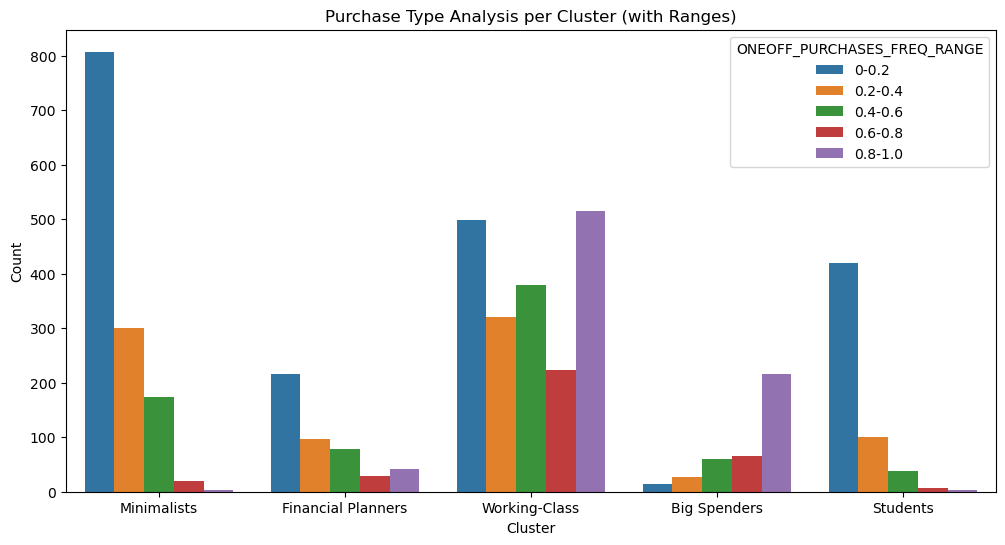

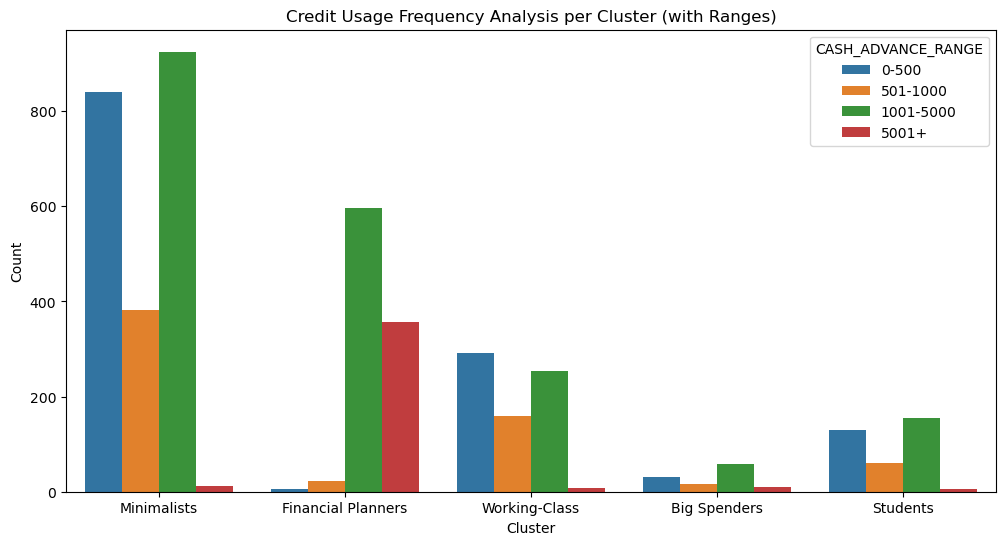

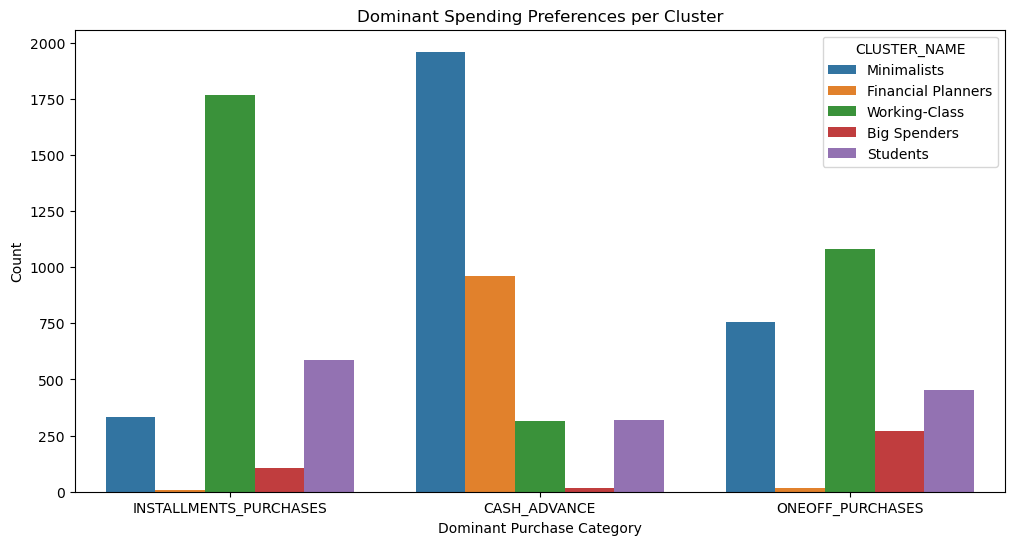

In [29]:
df_clusters['BALANCE_RANGE'] = pd.cut(df_clusters['BALANCE'], bins=[0, 1000, 5000, 10000, np.inf], labels=['0-1000', '1001-5000', '5001-10000', '10001+'])
df_clusters['PURCHASES_RANGE'] = pd.cut(df_clusters['PURCHASES'], bins=[0, 500, 1000, 5000, np.inf], labels=['0-500', '501-1000', '1001-5000', '5001+'])
df_clusters['CASH_ADVANCE_RANGE'] = pd.cut(df_clusters['CASH_ADVANCE'], bins=[0, 500, 1000, 5000, np.inf], labels=['0-500', '501-1000', '1001-5000', '5001+'])
df_clusters['ONEOFF_PURCHASES_FREQ_RANGE'] = pd.cut(df_clusters['ONEOFF_PURCHASES_FREQUENCY'], bins=[0, 0.2, 0.4, 0.6, 0.8, 1.0], labels=['0-0.2', '0.2-0.4', '0.4-0.6', '0.6-0.8', '0.8-1.0'])
df_spending = df_clusters.copy()
df_spending['DOMINANT_PURCHASE_CATEGORY'] = df_spending[['ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE']].idxmax(axis=1)

plt.figure(figsize=(12, 6))
sns.countplot(x='CLUSTER_NAME', hue='BALANCE_RANGE', data=df_clusters)
plt.title('Balance Analysis (with Ranges)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='CLUSTER_NAME', hue='PURCHASES_RANGE', data=df_clusters)
plt.title('Purchase Frequency Analysis per Cluster (with Ranges)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='CLUSTER_NAME', hue='ONEOFF_PURCHASES_FREQ_RANGE', data=df_clusters)
plt.title('Purchase Type Analysis per Cluster (with Ranges)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(x='CLUSTER_NAME', hue='CASH_ADVANCE_RANGE', data=df_clusters)
plt.title('Credit Usage Frequency Analysis per Cluster (with Ranges)')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=df_spending, x='DOMINANT_PURCHASE_CATEGORY', hue='CLUSTER_NAME')
plt.title('Dominant Spending Preferences per Cluster')
plt.xlabel('Dominant Purchase Category')
plt.ylabel('Count')
plt.show()

In [30]:
file_path = 'marketing_suggestions.txt' 
with open(file_path, 'r') as file:
    file_contents = file.read()

    print(file_contents)

Financial Planners:
In this cluster, we find individuals who exhibit balanced financial behavior and manage their budgets with a long-term perspective. For them, I would suggest a marketing campaign that offers promotions on a variety of items to encourage regular spending and loyalty programs to maintain high engagement.

Big Spenders:
In this cluster, we find individuals with high balances and a high frequency of spending with high payment volumes. For them, I would recommend offering VIP programs, rewarding their loyalty with unique experiences, and offering consultancy on luxury products to maintain their high spending value.

Working-Class:
In this cluster, we can find diverse individuals, including families with children and young professionals with moderate incomes. Their budgets are moderately balanced, they are careful with expenses, and maintain low cash advances. For them, I would propose targeted offers based on their purchase history, focusing on medium to low-priced produ